In [ ]:
pip install pandas
pip install matplotlib
pip install seaborn

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error

In [3]:
df = pd.read_csv("flipkart_sales_data.csv")
print(df.head())

  Order ID   Product Name          Category     Price  Discount (%)  \
0  ORD0001       Bedsheet    Home & Kitchen  15612.85             5   
1  ORD0002       Football  Sports & Fitness  27499.43            15   
2  ORD0003  Mixer Grinder    Home & Kitchen  31677.56            25   
3  ORD0004     Smartphone       Electronics  42266.00             0   
4  ORD0005         Jacket           Fashion  31941.02            25   

   Quantity Sold  Total Sales Purchase Date Customer ID       Location  
0              3     44496.62    2025-01-22    CUST3723   Shahjahanpur  
1              4     93498.06    2024-05-07    CUST8889            Mau  
2              4     95032.68    2025-02-16    CUST3285       Bhiwandi  
3              5    211330.00    2024-12-31    CUST5220       Amravati  
4              5    119778.82    2024-11-25    CUST9638  Muzaffarnagar  


In [4]:
print("Missing values per column:\n", df.isnull().sum())

Missing values per column:
 Order ID         0
Product Name     0
Category         0
Price            0
Discount (%)     0
Quantity Sold    0
Total Sales      0
Purchase Date    0
Customer ID      0
Location         0
dtype: int64


In [7]:
df.dropna(inplace=True)

In [9]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       500 non-null    object 
 1   Product Name   500 non-null    object 
 2   Category       500 non-null    object 
 3   Price          500 non-null    float64
 4   Discount (%)   500 non-null    int64  
 5   Quantity Sold  500 non-null    int64  
 6   Total Sales    500 non-null    float64
 7   Purchase Date  500 non-null    object 
 8   Customer ID    500 non-null    object 
 9   Location       500 non-null    object 
dtypes: float64(2), int64(2), object(6)
memory usage: 39.2+ KB
None


In [10]:
print(df.isnull().sum())

Order ID         0
Product Name     0
Category         0
Price            0
Discount (%)     0
Quantity Sold    0
Total Sales      0
Purchase Date    0
Customer ID      0
Location         0
dtype: int64


In [13]:
df_clean = df.drop_duplicates()
df_clean["Purchase Date"] = pd.to_datetime(df_clean["Purchase Date"], errors="coerce")

df_clean.to_csv("flipkart_sales_data_cleaned.csv", index=False)
print("Data cleaning completed and saved!")

Data cleaning completed and saved!


In [14]:
df_clean["Month-Year"] = df_clean["Purchase Date"].dt.to_period("M")

In [10]:
# Print all column names in the dataset
print(df.columns)


Index(['Order ID', 'Product Name', 'Category', 'Price', 'Discount (%)',
       'Quantity Sold', 'Total Sales', 'Purchase Date', 'Customer ID',
       'Location'],
      dtype='object')


In [15]:
df['Purchase Date'] = pd.to_datetime(df['Purchase Date'], errors='coerce')

# Extract date features
df['Day'] = df['Purchase Date'].dt.day
df['Month'] = df['Purchase Date'].dt.month
df['Year'] = df['Purchase Date'].dt.year

# Define features and target variable
X = df[['Day', 'Month', 'Year']]
y = df['Total Sales']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict sales on test set
y_pred = model.predict(X_test)

# Model evaluation
rmse = root_mean_squared_error(y_test, y_pred,)
print(f"Root Mean Squared Error (RMSE): {rmse}")

Root Mean Squared Error (RMSE): 42200.54346545366


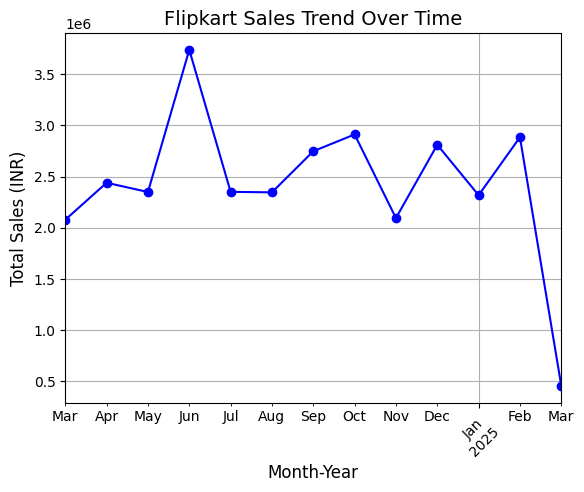

In [23]:
# Sales Trend Over Time

df_clean.groupby("Month-Year")["Total Sales"].sum().plot(marker="o", color="b", linestyle="-")
plt.title("Flipkart Sales Trend Over Time", fontsize=14)
plt.xlabel("Month-Year", fontsize=12)
plt.ylabel("Total Sales (INR)", fontsize=12)
plt.xticks(rotation=45)
plt.grid()
plt.show()

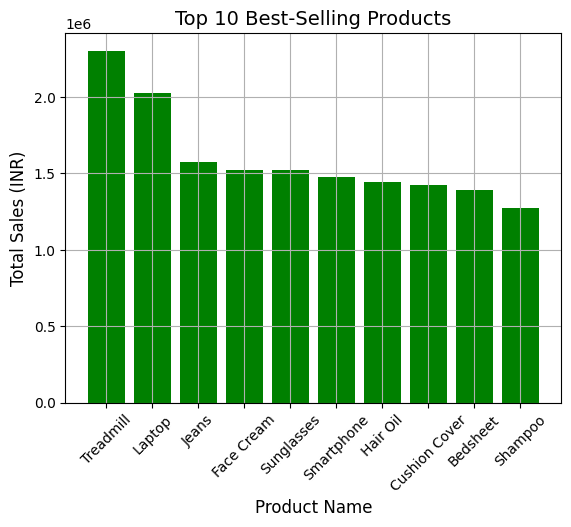

In [42]:
# Top 10 Best-Selling Products

top_products = df_clean.groupby("Product Name")["Total Sales"].sum().nlargest(10)
x = top_products.index
y = top_products.values
plt.bar(x,y, color="g")
plt.title("Top 10 Best-Selling Products", fontsize=14)
plt.xlabel("Product Name", fontsize=12)
plt.ylabel("Total Sales (INR)", fontsize=12)
plt.xticks(rotation=45)
plt.grid()
plt.show()

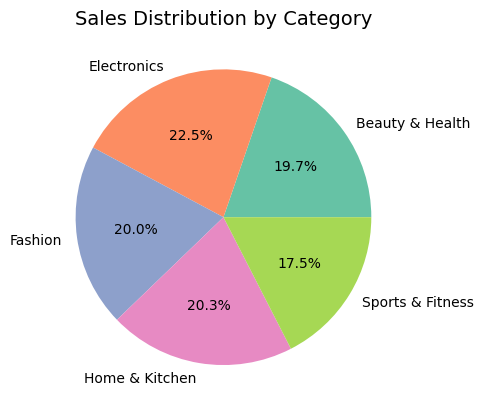

In [43]:
# Sales Distribution by Category

category_sales = df_clean.groupby("Category")["Total Sales"].sum()
plt.pie(category_sales, labels=category_sales.index, autopct="%1.1f%%", colors=sns.color_palette("Set2"))
plt.title("Sales Distribution by Category", fontsize=14)
plt.show()

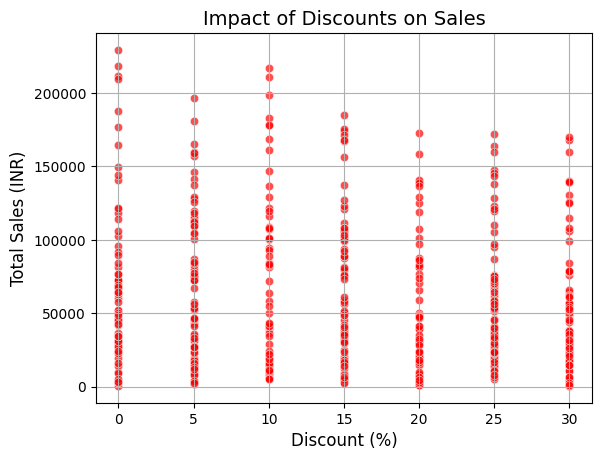

In [27]:
# Impact of Discounts on Sales

sns.scatterplot(x=df_clean["Discount (%)"], y=df_clean["Total Sales"], alpha=0.7, color="r")
plt.title("Impact of Discounts on Sales", fontsize=14)
plt.xlabel("Discount (%)", fontsize=12)
plt.ylabel("Total Sales (INR)", fontsize=12)
plt.grid(True)
plt.show()

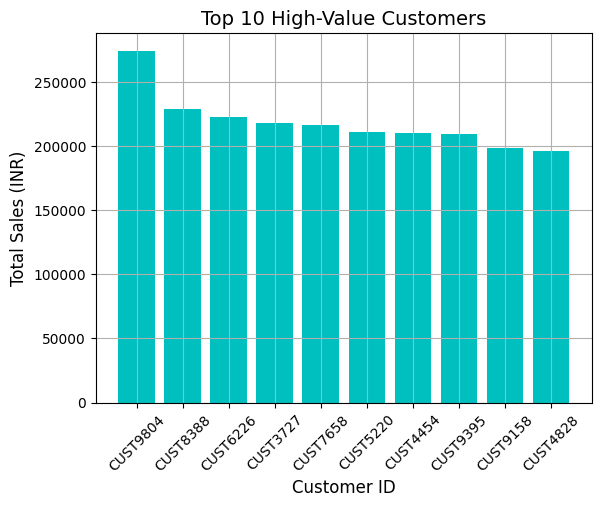

In [41]:
# Customer Segmentation

top_customers = df_clean.groupby("Customer ID")["Total Sales"].sum().nlargest(10)

x = top_customers.index
y = top_customers.values

plt.bar(x,y, color="c")
plt.title("Top 10 High-Value Customers", fontsize=14)
plt.xlabel("Customer ID", fontsize=12)
plt.ylabel("Total Sales (INR)", fontsize=12)
plt.xticks(rotation=45)
plt.grid()
plt.show()

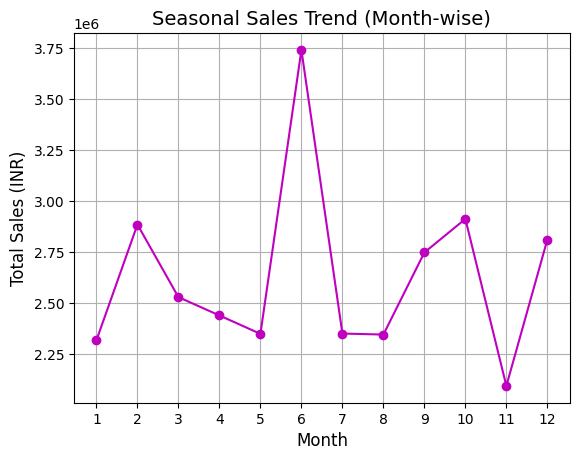

In [40]:
# Seasonal Sales Trends (Month-wise Sales)

df_clean["Month"] = df_clean["Purchase Date"].dt.month
monthly_sales = df_clean.groupby("Month")["Total Sales"].sum()

x = monthly_sales.index
y = monthly_sales.values

plt.plot(x,y,marker="o", color="m", linestyle="-")
plt.title("Seasonal Sales Trend (Month-wise)", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Total Sales (INR)", fontsize=12)
plt.xticks(range(1, 13))
plt.grid(True)
plt.show()

In [33]:
# Average Order Value 

AOV = df_clean["Total Sales"].sum() / df_clean["Order ID"].nunique()
print(f"Average Order Value: {AOV:.2f} INR")

Average Order Value: 63028.40 INR


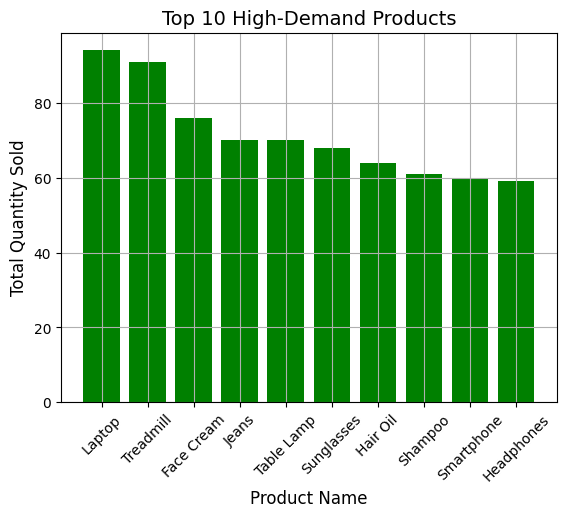

In [39]:
# Product Demand vs. Availability

demand_products = df_clean.groupby("Product Name")["Quantity Sold"].sum().nlargest(10)

x = demand_products.index
y = demand_products.values

plt.bar(x, y, color="g")
plt.title("Top 10 High-Demand Products", fontsize=14)
plt.xlabel("Product Name", fontsize=12)
plt.ylabel("Total Quantity Sold", fontsize=12)
plt.xticks(rotation=45)
plt.grid()
plt.show()


